In [1]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
import obspy

In [2]:
pref="/uufs/chpc.utah.edu/common/home/koper-group1/alysha/Yellowstone/data/waveformArchive/pDetector"
validate_file = f"{pref}/p_resampled_10s/currenteq.validate.10s.1dup.csv"
catalog_file= f"{pref}/P_current_earthquake_catalog.csv"
catalog_wf_file = f"{pref}/P_current_earthquake_catalog.h5"

validate_df = pd.read_csv(validate_file)
catalog_df = pd.read_csv(catalog_file)

In [3]:
validate_df.head()

,evid,network,station,location,channelz,channel1,channel2,phase,arrival_time,pick_quality,...,event_lon,event_depth,origin_time,magnitude,magnitude_type,rflag,event_type,original_rows,qc_rows,date
0,60067967,US,HWUT,1.0,BHZ,BHN,BHE,P,1.399620e+09,0.75,...,-112.495667,0.34,1.399620e+09,0.89,d,F,le,26883,26883,140509
1,60440722,WY,YNR,1.0,HHZ,HHN,HHE,P,1.624286e+09,0.75,...,-110.783333,7.75,1.624286e+09,1.03,l,F,le,163555,163555,210621
2,60441072,PB,B207,NaN,EHZ,EH1,EH2,P,1.624307e+09,0.75,...,-110.758833,8.05,1.624307e+09,1.33,l,F,le,164075,164075,210621
3,60094757,WY,YUF,1.0,HHZ,HHN,HHE,P,1.417689e+09,1.00,...,-110.521500,6.03,1.417689e+09,2.08,l,F,le,35484,35484,141204
4,60337937,UU,CTU,1.0,HHZ,HHN,HHE,P,1.567088e+09,0.75,...,-111.572667,6.07,1.567088e+09,1.20,l,F,le,108488,108488,190829


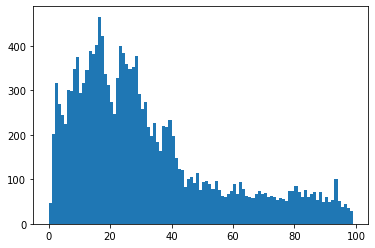

In [4]:
plt.hist(validate_df.source_receiver_distance, bins=np.arange(0, 100));

## Filter the catalog

In [5]:
# Limit to 35 km because 40 km should have a S-P time of ~500 samples - 
# which puts the second event P very close to first event S
validate_df = validate_df[validate_df.source_receiver_distance <= 35]

In [6]:
catalog_df.head()

,evid,network,station,location,channelz,channel1,channel2,phase,arrival_time,pick_quality,...,receiver_lon,receiver_elev,event_lat,event_lon,event_depth,origin_time,magnitude,magnitude_type,rflag,event_type
0,60000004,UU,JLU,1.0,HHZ,HHN,HHE,P,1.349658e+09,1.00,...,-111.44995,2285.0,40.567833,-111.2855,12.41,1.349658e+09,0.01,d,F,le
1,60000004,UU,BSUT,1.0,HHZ,HHN,HHE,P,1.349658e+09,0.50,...,-110.76120,3211.0,40.567833,-111.2855,12.41,1.349658e+09,0.01,d,F,le
2,60000005,WY,YMR,1.0,HHZ,HHN,HHE,P,1.349112e+09,0.75,...,-110.96500,2149.0,44.743333,-111.0675,5.48,1.349112e+09,-0.20,d,F,le
3,60000005,WY,YHH,1.0,HHZ,HHN,HHE,P,1.349112e+09,0.75,...,-110.85050,2717.0,44.743333,-111.0675,5.48,1.349112e+09,-0.20,d,F,le
4,60000010,PB,B207,1.0,EHZ,EHN,EHE,P,1.349101e+09,0.50,...,-110.84850,2182.0,44.438167,-111.0320,6.05,1.349101e+09,0.35,d,F,le


## Randomly sample waveforms

In [7]:
rand_ind_first = np.random.randint(0, len(validate_df))
rand_row_first = validate_df.iloc[rand_ind_first]

In [8]:
rand_row_first

evid                           60429432
network                              WY
station                             YHH
location                              1
channelz                            HHZ
channel1                            HHN
channel2                            HHE
phase                                 P
arrival_time                1.61593e+09
pick_quality                          1
first_motion                          1
take_off_angle                      110
source_receiver_distance           23.4
source_receiver_azimuth            11.2
travel_time_residual              -0.18
receiver_lat                    44.7883
receiver_lon                    -110.85
receiver_elev                      2717
event_lat                        44.582
event_lon                      -110.908
event_depth                       11.75
origin_time                 1.61593e+09
magnitude                          0.94
magnitude_type                        l
rflag                                 F


In [9]:
min_mag2_diff = 0.1  # How much smaller than the first event can the second event be 
max_mag2_diff = 1.5  # How much bigger than the first event can the second event be

z_indicator = "channelz"
evid = rand_row_first.evid
net = rand_row_first.network
sta = rand_row_first.station
cha = rand_row_first[z_indicator]
loc = rand_row_first.location
mag = rand_row_first.magnitude
sr_dist = rand_row_first.source_receiver_distance
df_subset = validate_df[ (validate_df.evid != evid) & (validate_df.network == net) & (validate_df.station == sta) &
                         (validate_df[z_indicator] == cha) & (validate_df.location == loc) &
                         (validate_df.magnitude >= mag-min_mag2_diff) & (validate_df.magnitude <= mag+max_mag2_diff)]

In [10]:
df_subset

,evid,network,station,location,channelz,channel1,channel2,phase,arrival_time,pick_quality,...,event_lon,event_depth,origin_time,magnitude,magnitude_type,rflag,event_type,original_rows,qc_rows,date
164,60076377,WY,YHH,1.0,HHZ,HHN,HHE,P,1.404692e+09,0.75,...,-111.114333,6.74,1.404692e+09,0.88,l,F,le,30900,30900,140707
178,60440962,WY,YHH,1.0,HHZ,HHN,HHE,P,1.624299e+09,1.00,...,-110.759833,7.13,1.624299e+09,1.60,l,F,le,163933,163933,210621
288,60464587,WY,YHH,1.0,HHZ,HHN,HHE,P,1.635128e+09,0.75,...,-110.675000,4.57,1.635128e+09,1.59,l,F,le,180802,180802,211025
337,60302217,WY,YHH,1.0,HHZ,HHN,HHE,P,1.540379e+09,1.00,...,-110.494000,2.01,1.540379e+09,0.93,l,F,le,92615,92615,181024
408,60300767,WY,YHH,1.0,HHZ,HHN,HHE,P,1.539515e+09,1.00,...,-111.038000,7.08,1.539515e+09,0.92,l,F,le,92062,92062,181014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17460,60423607,WY,YHH,1.0,HHZ,HHN,HHE,P,1.609949e+09,1.00,...,-110.663833,2.44,1.609949e+09,1.82,l,F,le,156193,156193,210106
17772,60398812,WY,YHH,1.0,HHZ,HHN,HHE,P,1.593146e+09,1.00,...,-110.972667,8.53,1.593146e+09,1.28,l,F,le,144428,144428,200626
17820,60118697,WY,YHH,1.0,HHZ,HHN,HHE,P,1.438162e+09,1.00,...,-111.013167,14.20,1.438162e+09,1.67,l,F,le,42033,42033,150729
17859,60338877,WY,YHH,1.0,HHZ,HHN,HHE,P,1.567660e+09,1.00,...,-110.954500,5.27,1.567660e+09,1.11,l,F,le,108905,108905,190905


In [11]:
rand_ind_subset = np.random.randint(0, len(df_subset))
rand_row_second = df_subset.iloc[rand_ind_subset]


In [12]:
rand_row_first

evid                           60429432
network                              WY
station                             YHH
location                              1
channelz                            HHZ
channel1                            HHN
channel2                            HHE
phase                                 P
arrival_time                1.61593e+09
pick_quality                          1
first_motion                          1
take_off_angle                      110
source_receiver_distance           23.4
source_receiver_azimuth            11.2
travel_time_residual              -0.18
receiver_lat                    44.7883
receiver_lon                    -110.85
receiver_elev                      2717
event_lat                        44.582
event_lon                      -110.908
event_depth                       11.75
origin_time                 1.61593e+09
magnitude                          0.94
magnitude_type                        l
rflag                                 F


In [13]:
rand_row_second

evid                           60097387
network                              WY
station                             YHH
location                              1
channelz                            HHZ
channel1                            HHN
channel2                            HHE
phase                                 P
arrival_time                1.42024e+09
pick_quality                          1
first_motion                          1
take_off_angle                      103
source_receiver_distance             24
source_receiver_azimuth           339.2
travel_time_residual              -0.24
receiver_lat                    44.7883
receiver_lon                    -110.85
receiver_elev                      2717
event_lat                       44.5868
event_lon                      -110.743
event_depth                        9.79
origin_time                 1.42024e+09
magnitude                          1.52
magnitude_type                        d
rflag                                 F


In [14]:
file = h5py.File(catalog_wf_file, "r")
wf1 = file["X"][rand_row_first.original_rows]
wf2 = file["X"][rand_row_second.original_rows]
file.close()

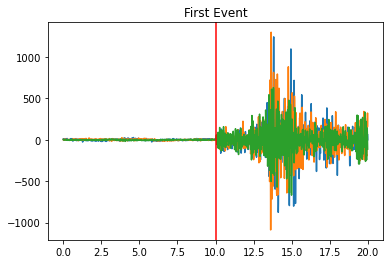

In [15]:
plt.plot(np.arange(0, 20, 0.01), wf1[:, :])
plt.axvline(10, color="r")
plt.title("First Event");

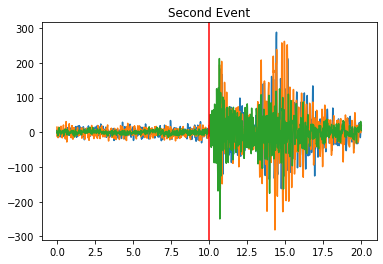

In [16]:
plt.plot(np.arange(0, 20, 0.01), wf2[:, :])
plt.axvline(10, color="r")
plt.title("Second Event");

## Rescale Waveforms

In [17]:
def rescale_waveform(x_large, x_small, mag_diff, to_plot=False):
    assert mag_diff >= 0, "Magnitude difference must be non-negative"
    # When traces are 

    large_max = np.max(abs(x_large))
    small_max = np.max(abs(x_small))
    
    print("Large event max amplitude", large_max)
    print("Small event max amplituide", small_max)
    new_small_max = large_max * 1 / 10 ** (mag_diff)
    print("reduce small event amplitude by", 10 ** mag_diff)
    print("new max of small event should be", new_small_max)
    rescale_factor = small_max / new_small_max
    x_small_rescaled = x_small / rescale_factor
    print("new max is", np.max(abs(x_small_rescaled)))
    if to_plot:
        fig, axes = plt.subplots(3)
        axes[0].plot(range(x_small.shape[0]), x_small[:, 0])
        axes[0].plot(range(x_small.shape[0]), x_small_rescaled[:, 0])
        axes[1].plot(range(x_small.shape[0]), x_small[:, 1])
        axes[1].plot(range(x_small.shape[0]), x_small_rescaled[:, 1])
        axes[2].plot(range(x_small.shape[0]), x_small[:, 2])
        axes[2].plot(range(x_small.shape[0]), x_small_rescaled[:, 2])
        plt.suptitle((f"Magnitude difference: {mag_diff:0.2f} - Reduced by: {rescale_factor}"))
        plt.show()
        #plt.close()
    #print("new max with other equation", np.max(abs(x_small * m1_max / (m2_max * 10 ** mag_diff))))
    #print("calculate magnitude difference by log10(amplitude ratio)", np.log10(m1_max / np.max(abs(m2_new))))
    return x_small_rescaled, x_small, rescale_factor

In [18]:
mag_diff = rand_row_first.magnitude - rand_row_second.magnitude

In [19]:
# Normalize the traces together so relative information is preserved
wf1_max = np.max(abs(wf1))
wf1_norm = wf1/wf1_max

wf2_max = np.max(abs(wf2))
wf2_norm = wf2/wf2_max

Large event max amplitude 1.0
Small event max amplituide 1.0
reduce small event amplitude by 3.80189396321
new max of small event should be 0.26302679919
new max is 0.263027


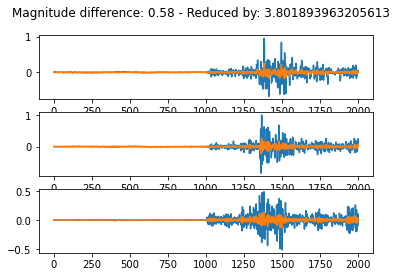

In [20]:
# Rescale the magnitudes by comparing the maximum amplitude of the waveform
if mag_diff > 0:
    wf2_norm, x_small, rescale_factor = rescale_waveform(wf1_norm, wf2_norm, mag_diff, to_plot=True)
elif mag_diff < 0:
    wf1_norm, x_small, rescale_factor = rescale_waveform(wf2_norm, wf1_norm, abs(mag_diff), to_plot=True)

## Get random waveform shifts

In [22]:
wf_length = 1008
center_window_size = 250

# Minimum allowed separation between the first event P and the second event P - try to have after S arrival coda
min_sep = np.max([200, int(sr_dist / 6*100) + 50])
min_wf2 = 150

print(f"Minimum separation for SR_dist of {sr_dist} km: {min_sep}")

center_window_ub = wf_length//2 + center_window_size
center_window_lb = wf_length//2 - center_window_size

max_first_event_sample = np.min([wf_length - min_sep - min_wf2, center_window_ub])
min_first_event_sample = center_window_lb
first_event_sample = np.random.randint(min_first_event_sample, max_first_event_sample)

print("First event bounds:", min_first_event_sample, max_first_event_sample)
print("Random start sample:", first_event_sample)

Minimum separation for SR_dist of 23.4 km: 440
First event bounds: 254 418
Random start sample: 309


In [23]:
# np.random.randint(-max_lag, max_lag+1, size=n_obs*n_duplicate)
# np.random.randint in range [low, high) => includes [-250, 250]
min_second_event_sample = np.max([center_window_ub+1, first_event_sample + min_sep])
max_second_event_sample = wf_length - min_wf2
second_event_sample = np.random.randint(min_second_event_sample, max_second_event_sample)

print("Second event bounds:",min_second_event_sample, max_second_event_sample)
print("Random start sample:", second_event_sample)

Second event bounds: 755 858
Random start sample: 835


In [24]:
# Trim first waveform to 1008 samples
org_pick_sample = wf1.shape[0]//2
wf1_trim = wf1_norm[org_pick_sample-first_event_sample:org_pick_sample+(wf_length-first_event_sample)]
assert wf1_trim.shape[0] == wf_length, "WF1 is the wrong length"

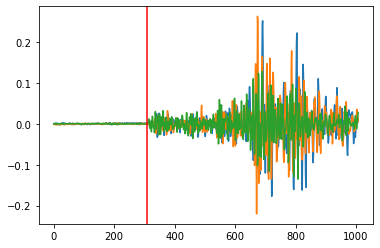

In [25]:
plt.plot(range(wf_length), wf1_trim[:, :])
plt.axvline(first_event_sample, color="r")

In [26]:
wf2_buffer = 10
# Trim from -10 to 254 samples (max possible size)
wf2_trim = np.copy(wf2_norm[org_pick_sample-wf2_buffer:org_pick_sample+(wf_length - center_window_ub)])
assert wf2_trim.shape[0] == (wf_length - center_window_ub)+wf2_buffer, "WF2 trim is wrong size"

In [42]:
# Make and obspy stream to taper it
channels = {0:"E", 1:"N", 2:"Z"}
st = obspy.Stream()
for ind in range(3):
    tr = obspy.Trace(np.copy(wf2_trim[:, ind]))
    tr.stats.channel = channels[ind]
    tr.stats.delta = 0.01
    tr.stats.sampling_rate = 100
    st += tr
    print(st[ind].stats)

         network: 
         station: 
        location: 
         channel: E
       starttime: 1970-01-01T00:00:00.000000Z
         endtime: 1970-01-01T00:00:02.630000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 264
           calib: 1.0
         network: 
         station: 
        location: 
         channel: N
       starttime: 1970-01-01T00:00:00.000000Z
         endtime: 1970-01-01T00:00:02.630000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 264
           calib: 1.0
         network: 
         station: 
        location: 
         channel: Z
       starttime: 1970-01-01T00:00:00.000000Z
         endtime: 1970-01-01T00:00:02.630000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 264
           calib: 1.0


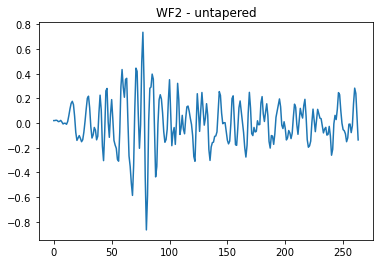

In [43]:
plt.plot(np.arange(st[0].stats.npts), st[2].data)
plt.title("WF2 - untapered");

In [47]:
# st.taper(max_percentage=0.05)
taper_percent = None #0.04 
taper_max_length = 0.09 #seconds
st.taper(type="cosine", max_percentage=taper_percent, max_length=taper_max_length, side="left")

3 Trace(s) in Stream:
...E | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:02.630000Z | 100.0 Hz, 264 samples
...N | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:02.630000Z | 100.0 Hz, 264 samples
...Z | 1970-01-01T00:00:00.000000Z - 1970-01-01T00:00:02.630000Z | 100.0 Hz, 264 samples

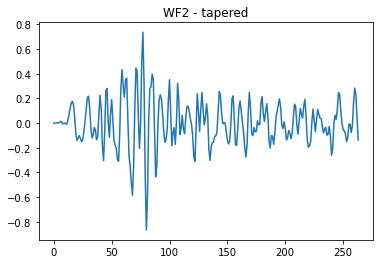

In [48]:
plt.plot(np.arange(st[0].stats.npts), st[2].data)
plt.title("WF2 - tapered");

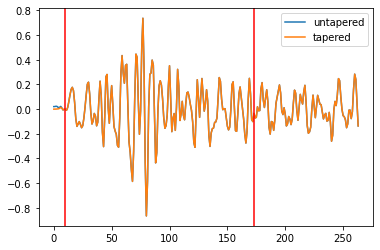

In [49]:
plt.plot(np.arange(0, wf2_trim.shape[0]), wf2_trim[:, 2], label="untapered")
plt.plot(np.arange(0, wf2_trim.shape[0]), st[2].data, label="tapered")
plt.axvline(wf2_buffer, color="r")
plt.axvline(wf_length-second_event_sample, color="r")
plt.legend();

In [32]:
# Convert Stream back to an array
wf2_taper = np.concatenate([st[0].data.reshape(-1, 1), st[1].data.reshape(-1, 1), st[2].data.reshape(-1, 1)], axis=1)
# Trim the WF2 to the number of samples needed by removing samples from the right end 
wf2_taper_trim = wf2_taper[0:(wf_length-second_event_sample+wf2_buffer), :]

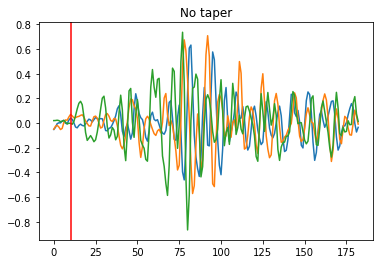

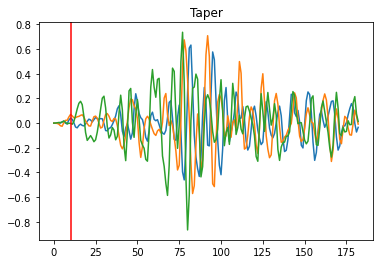

In [33]:
plt.plot(np.arange(0, wf2_taper_trim.shape[0]), wf2_trim[0:(wf_length-second_event_sample+wf2_buffer), :])
plt.axvline(wf2_buffer, color="r")
plt.title("No taper");

plt.figure()
plt.plot(np.arange(0, wf2_taper_trim.shape[0]), wf2_taper_trim[:, :])
plt.axvline(wf2_buffer, color="r")
plt.title("Taper");

In [34]:
# Pad the front of wf2 with zeros so length is wf_length 
wf2_padded = np.zeros_like(wf1_trim)
# Start wf2_buffer before the pick sample
wf2_padded[second_event_sample-wf2_buffer:] = wf2_taper_trim 

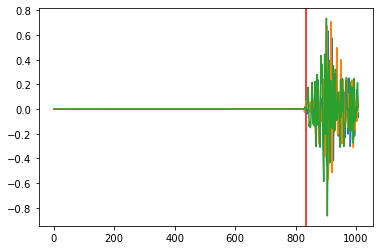

In [35]:
 plt.axvline(second_event_sample, color="r")
# plt.axvline(second_event_sample-wf2_buffer, color="r")
plt.plot(range(wf_length), wf2_padded)

In [36]:
combined_wf = wf1_trim + wf2_padded

In [37]:
boxcar_width = 25
boxcar = np.zeros(wf_length)
boxcar[first_event_sample-boxcar_width:first_event_sample+boxcar_width+1] = 1
boxcar[second_event_sample-boxcar_width:second_event_sample+boxcar_width+1] = 1

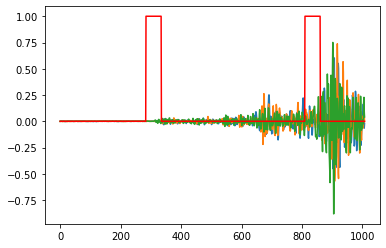

In [38]:
plt.plot(range(wf_length), combined_wf[:, :])
plt.plot(np.arange(wf_length), boxcar, color="red")